<a href="https://colab.research.google.com/github/pusane/DM_in_Python/blob/master/DeltaModulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Delta Modulation and Demodulation using Python**

We would first like to import the relevant libraries (notice the shorthands we define for convenience)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

Define message signal

In [16]:
# initialize the time vector
sampling_frequency = 88200 #Hz
signal_duration = 1 #seconds
time = np.arange(signal_duration*sampling_frequency) / sampling_frequency

# message signal properties
message_frequency = 40.0 #Hz
message_amplitude = 1

# calculate the message signal
message = message_amplitude*np.cos(2*np.pi*message_frequency*time)

# initialize an audio player
Audio(message,rate=sampling_frequency)

Define Delta Modulation properties

In [0]:
# delta sampling frequency as four times the Nyquist rate
delta_sampling_frequency = 16 * 2 * message_frequency # Hz

# define step size
delta_epsilon = 0.25

Now comes the actual modulator

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


(0.0, 0.1, -1.0, 1.0)

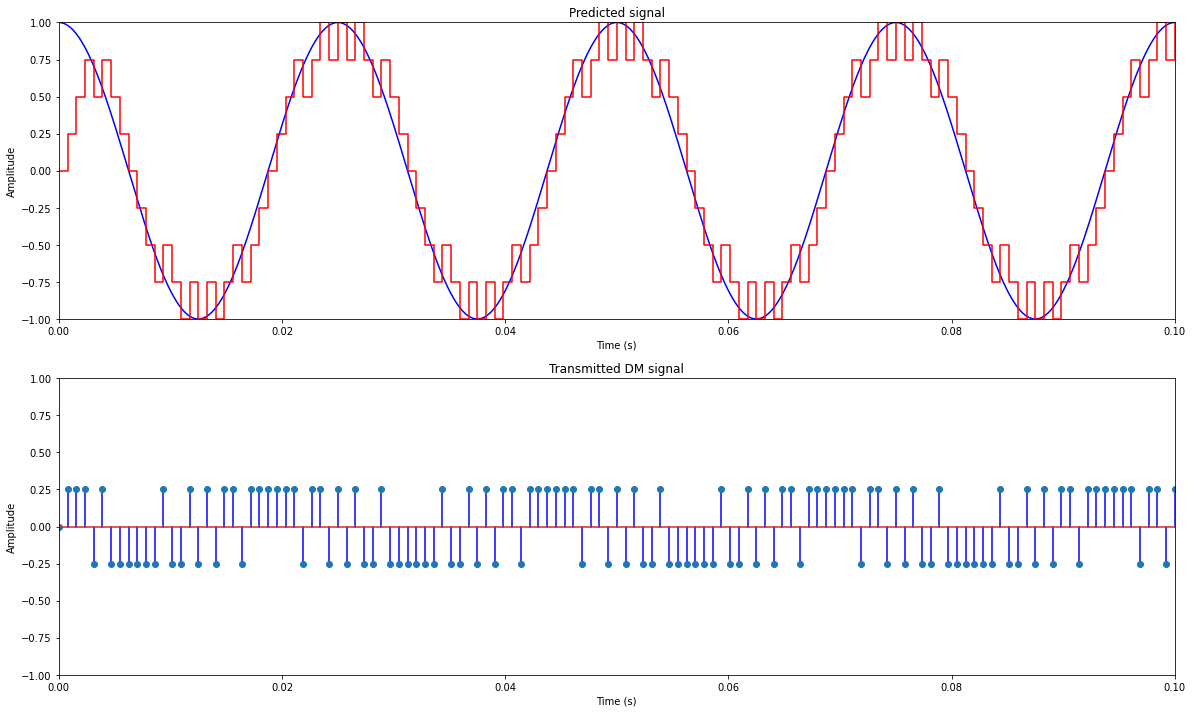

In [20]:
# define sample time array
delta_time = np.arange(signal_duration*delta_sampling_frequency) / delta_sampling_frequency

# allocate memory
prediction = np.zeros((int(signal_duration*delta_sampling_frequency),1))
modulated = np.zeros_like(prediction)

# go through the modulation loop
for i, t in enumerate(delta_time):
  if i>0:
    message_sample = int(round(i*sampling_frequency/delta_sampling_frequency))    
    modulated[i] = (2*int((message[message_sample]-prediction[i-1])>0)-1) * delta_epsilon
    prediction[i] = prediction[i-1] + modulated[i]
      
# plot obtained signals
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
plt.plot(time, message, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Message signal')
plt.axis([0, 0.1, -1, 1])

plt.step(delta_time, prediction, 'r', where='post')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Predicted signal')
plt.axis([0, 0.1, -1, 1])

plt.subplot(2,1,2)
plt.stem(delta_time, modulated, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Transmitted DM signal')
plt.axis([0, 0.1, -1, 1])